## Bu ödevde, bir önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.
ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic= pd.read_csv("Desktop/Bootcamp Ödevler/Sınıflandırma/train.csv")
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True, axis=0) 

In [5]:
category_col= ["Embarked", "Sex"]
df= pd.concat([titanic, pd.get_dummies(titanic[category_col])], axis=1)
df.drop(category_col, inplace=True, axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

### Logistic Regression:

In [6]:
ozellikler= ["Pclass","Age", "Embarked_C", "Embarked_Q", "Embarked_S", "Sex_female", "Sex_male"]
Y= df["Survived"]
X= df[ozellikler]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=111)

log_reg= LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
egitim_dogruluk= log_reg.score(X_train, Y_train)
test_dogruluk= log_reg.score(X_test, Y_test)

print("One vs Rest", "-"*30, "Eğitim kümesi doğruluğu: {}".format(egitim_dogruluk),
        "Test kümesi doğruluğu: {}".format(test_dogruluk), sep="\n")

One vs Rest
------------------------------
Eğitim kümesi doğruluğu: 0.7963483146067416
Test kümesi doğruluğu: 0.7597765363128491


In [8]:
#Multinomial yöntem:
lr_mnm= LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mnm.fit(X_train, Y_train)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=111)
egitim_dogruluk= lr_mnm.score(X_train, Y_train)
test_dogruluk= lr_mnm.score(X_test, Y_test)

print("Multinomial", "-"*30, "Eğitim kümesi doğruluğu: {}".format(egitim_dogruluk),
        "Test kümesi doğruluğu: {}".format(test_dogruluk), sep="\n")


Multinomial
------------------------------
Eğitim kümesi doğruluğu: 0.800561797752809
Test kümesi doğruluğu: 0.7653631284916201


In [9]:
#Tahminler:
tahmin_egitim= lr_mnm.predict(X_train)
tahmin_test= lr_mnm.predict(X_test)

tahmin_test_ihtimal= lr_mnm.predict_proba(X_train) #?????


In [10]:
from sklearn.metrics import confusion_matrix

hata_matrisi_egitim= confusion_matrix(Y_train, tahmin_egitim)
hata_matrisi_test= confusion_matrix(Y_test, tahmin_test)

print("Eğitim kümesi hata matrisi: ", "-"*30, hata_matrisi_egitim, 
      "Test kümesi hata matrisi: ", "-"*30, hata_matrisi_test, sep="\n")

TN= hata_matrisi_test[0][0]
FP= hata_matrisi_test[0][1]
FN= hata_matrisi_test[1][0]
TP= hata_matrisi_test[1][1]

print("True Negative: {}".format(TN))
print("False Positive: {}".format(FP))
print("False Negative: {}".format(FN))
print("True Positive: {}".format(TP))

Eğitim kümesi hata matrisi: 
------------------------------
[[372  64]
 [ 78 198]]
Test kümesi hata matrisi: 
------------------------------
[[92 21]
 [21 45]]
True Negative: 92
False Positive: 21
False Negative: 21
True Positive: 45


In [11]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  lr_mnm.score(X_test, Y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(Y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7653631284916201
Hesaplanan doğruluk değeri      :  0.7653631284916201
accuracy_score() değeri         :  0.7653631284916201


In [12]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.6818181818181818
precision_score() değeri        :  0.6818181818181818


In [13]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6818181818181818
recall_score() değeri        :  0.6818181818181818


In [14]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(Y_test, tahmin_test)
duyarlılık_değeri = recall_score(Y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(Y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.6818181818181818
f1_score() değeri     :  0.6818181818181818


In [15]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(Y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(Y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(Y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(Y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       113
           1       0.68      0.68      0.68        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

f1_score() değeri        : 0.68
recall_score() değeri    : 0.68
precision_score() değeri : 0.68


Hassasiyet : [0.81415929 0.68181818]
Duyarlılık : [0.81415929 0.68181818]
F1 Skoru   : [0.81415929 0.68181818]


## ROC eğrisi (AUC Değeri):

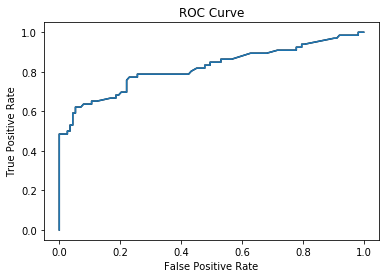

AUC Değeri: 0.8195226602306248


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
tahmin_test_ihtimal= lr_mnm.predict_proba(X_test)[:,1] # Anlamı nedir?????

fpr, tpr, thereshold= roc_curve(Y_test, tahmin_test_ihtimal)

plt.plot(fpr, tpr, "k-")
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("AUC Değeri: {}".format(roc_auc_score(Y_test, tahmin_test_ihtimal)))

## Hassasiyet Duyarlılık Eğrisi: (Precision Recall Curve)

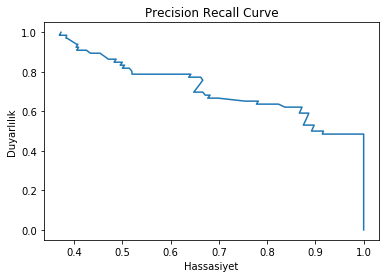

In [17]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _= precision_recall_curve(Y_test, tahmin_test_ihtimal)

plt.plot(hassasiyet, duyarlılık)
plt.title("Precision Recall Curve")
plt.xlabel("Hassasiyet")
plt.ylabel("Duyarlılık")
plt.show()


## Logaritmik Kayıp (Log Loss)

In [18]:
from sklearn.metrics import log_loss

print("Logaritmik Kayıp: {}".format(log_loss(Y_test, tahmin_test_ihtimal)))
print("Hata Oranı {}: ".format(1- accuracy_score(Y_test, tahmin_test)) )

Logaritmik Kayıp: 0.48006632127233734
Hata Oranı 0.23463687150837986: 
